In [ ]:
import cv2
import sys
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
import time
from IPython.display import Image, display
import pandas as pd
import re
from pathlib import Path
import itertools
from math import log
from functools import reduce
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Javeria
[nltk_data]     Shahid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Javeria Shahid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Javeria
[nltk_data]     Shahid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Javeria
[nltk_data]     Shahid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

gray image has gaussian noise
 


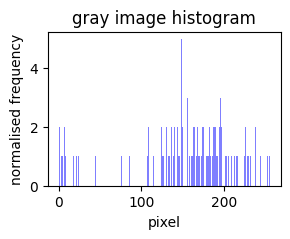

gray image has gaussian noise
 


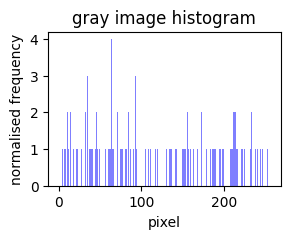

gray image has gaussian noise
 


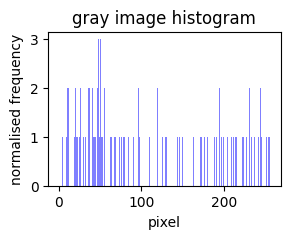

gray image has gaussian noise
 


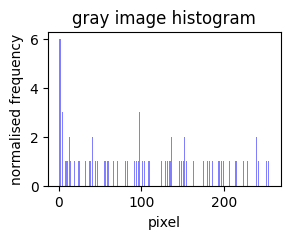

gray image has gaussian noise
 


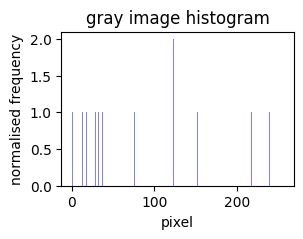

gray image has gaussian noise
 


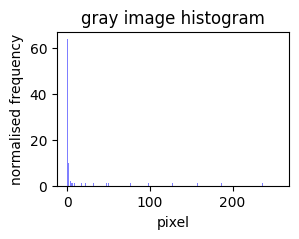

gray image has gaussian noise
 


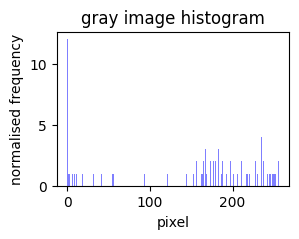

gray image has gaussian noise
 


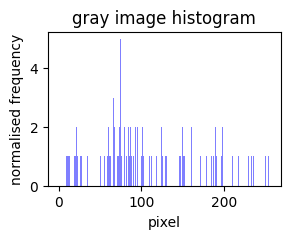

gray image has gaussian noise
 


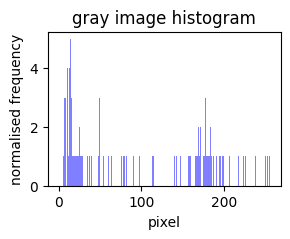

gray image has gaussian noise
 


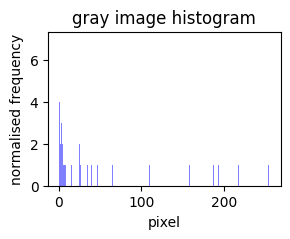

gray image has gaussian noise
 


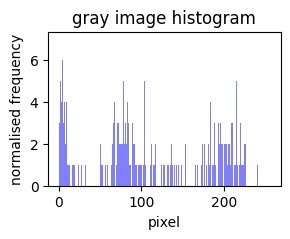

gray image has gaussian noise
 


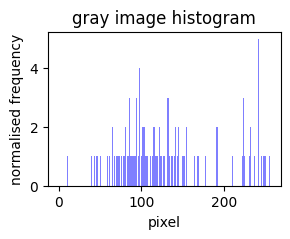

gray image has gaussian noise
 


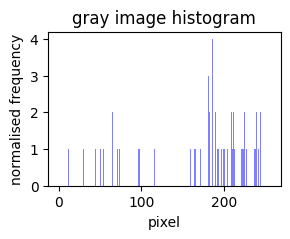

gray image has gaussian noise
 


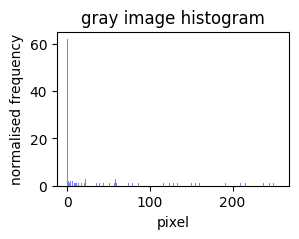

gray image has gaussian noise
 


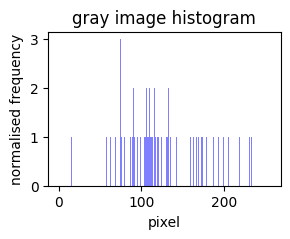

gray image has gaussian noise
 


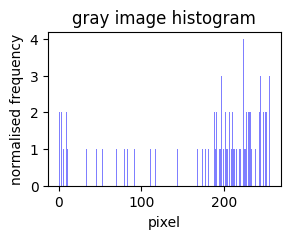

gray image has gaussian noise
 


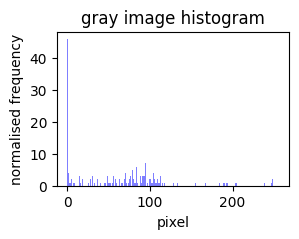

gray image has gaussian noise
 


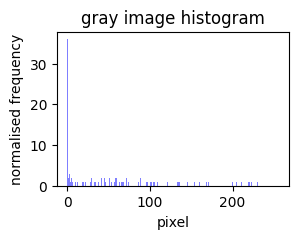

gray image has gaussian noise
 


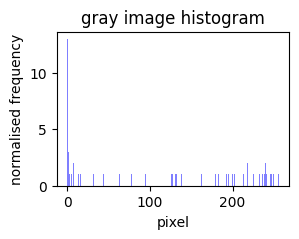

gray image has gaussian noise
 


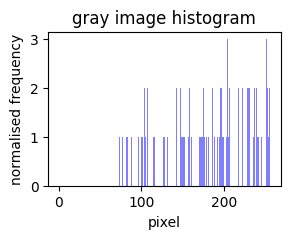

In [ ]:
for i in range(1,21):

    image_path=f'D://uni/vis/A2/{i}.jpg'


    image=cv2.imread(image_path)


    height, width, channels=image.shape
    gray=image
    for i in range(height):
        for j in range(width):
            gray[i, j]=0.3*image[i,j][0]+0.59*image[i,j][1]+0.11*image[i,j][2]

    cv2.imshow('gray image ', gray)
    #using sobels for first order and 3x3 filter for edge detection
    sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

    #correlation

    correlation_output=cv2.filter2D(gray,-1, sobel_x)
    cv2.imshow('correlation result', correlation_output)

    #convolution
    convo=np.flip(sobel_x)
    convo_output=cv2.filter2D(gray,-1, convo)
    cv2.imshow('convolution output', convo_output)

    #2nd order  and laplacian edge detection
    laplacian=np.array([[0,1,0], [1,-4,1],[0,1,0]])
    laplacian_output=cv2.filter2D(gray, -1, laplacian)
    cv2.imshow('laplacian output', laplacian_output)

    #using histograms to identify the type of noise
    histogram=cv2.calcHist([gray], [0], None, [256], [0,256])
    histogram=histogram.flatten()
    plt.figure(figsize=(3,2))
    plt.hist(histogram, bins=256, range=(0,256), color='b', alpha=0.5)
    plt.title('gray image histogram')
    plt.xlabel("pixel")
    plt.ylabel('normalised frequency')

    means=np.mean(gray)
    standarddev=np.std(gray)
    if standarddev<30:
        print('gray image has salt and pepper noise\n')
        #using median filter
        median_output=cv2.medianBlur(gray, ksize=3)
        cv2.imshow('median filter for salt and pepper', median_output)
    else:
        print("gray image has gaussian noise\n ")
        ksize=(5,5)
        gaussian_output=cv2.GaussianBlur(gray, ksize, 0)
        #gaussian_output=gray
        cv2.imshow('gaussian blur output', gaussian_output)

    plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()


Q2

In [ ]:
df=pd.read_csv("Labelled  Tweets.csv", header=0)
df.head()
#taking class as Y and tweets as X
X=df['Class']
Y=df['Tweets']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
#Bow
vectorizer=CountVectorizer()
bow=vectorizer.fit_transform(df['Tweets'])

vocabulary=vectorizer.get_feature_names_out()
print(bow.toarray())
print(vocabulary)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '0000000000000' ... 'zzzentropy' 'zzzquil' 'zzzzzz']


In [ ]:
tfidfVectorizer=TfidfVectorizer()
tfidf=tfidfVectorizer.fit_transform(df['Tweets'])
output=tfidf.toarray()
features=tfidfVectorizer.get_feature_names_out()
idfValues=tfidfVectorizer.idf_

for i in idfValues:
    print(round(i, 3))


9.326
7.94
10.425
10.425
10.425
10.425
10.425
10.425
9.732
10.425
10.425
9.039
10.425
10.019
10.425
10.425
10.425
10.019
8.122
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.019
10.425
9.326
9.732
10.425
10.425
10.425
10.425
9.039
10.425
10.425
10.019
10.425
10.425
10.425
10.425
10.425
10.425
10.019
9.732
10.425
10.425
10.425
10.425
10.425
10.425
10.019
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
10.425
6.483
7.148
9.326
10.425
9.509
7.652
10.425
10.019
10.425
9.509
9.732
9.732
9.732
10.019
10.425
8.553
7.652
10.425
10.425
10.425
9.732
9.509
10.019
10.425
8.228
10.425
10.425
10.425
10.019
9.172
10.019
8.921
9.172
7.751
10.425
9.732
10.425
9.039
10.019
10.425
9.732
10.425
9.326
9.509
10.425
9.509
9.732
10.425
10.425
10.425
10.425
9.326
9.326
10.425
10.425
8.553
10.425
9.326
10.425
10.019
8.921
8.174
10.01

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
labels=df['Class']
def sigmoid(z):
    result=1/1+np.exp(-z)
    return result
def predict(x, weights):
    return sigmoid(np.dot(x,weights)) #dot product
def cost(y, yp):
    m=len(y)

    individual_costs = -y * np.log(yp) - (1 - y) * np.log(1 - yp)
    return 1/m * np.sum(individual_costs)

def gradientDescent(x, y, yp, learning, weights):
    m=len(y)
    gradient=np.dot(x.T, (yp-y))/m
    weights-=learning*gradient
    return weights



In [ ]:
#applying it on tfidf first
tf=tfidf
tf=tf.toarray()
y=np.array(labels)
weights=np.zeros(tf.shape[1])
learning=0.01
iterations=100
for i in range(iterations):
    yp=predict(tf,weights)
    Cost=cost(y, yp)
    weights=gradientDescent(tf,y,yp,learning ,weights)


pred=(yp>=0.5).astype(int)
accuracy=accuracy_score(y, pred)
precision = precision_score(y, pred)
recall = recall_score(y, pred)
f1 = f1_score(y, pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8366622281402575
Precision: 0.9752066115702479
Recall: 0.028344943550324287
F1 Score: 0.055088702147525676


In [ ]:
#applying it on bow
from scipy import sparse
vectorizer = CountVectorizer(max_features=1000)  # Adjust the number as needed
xbow=vectorizer.fit_transform(df['Tweets'])
x=xbow.toarray()
y=np.array(labels)
train_size = int(0.8 * len(labels))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

weights=np.zeros(x.shape[1])
learning=0.01
iterations=100
for i in range(iterations):
    yp=predict(x,weights)
    Cost=cost(y, yp)
    weights=gradientDescent(x,y,yp,learning ,weights)

yp_test = predict(x_test, weights)
pred = (yp_test >= 0.5).astype(int)

accuracy=accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1 Score:", f1)

C:\Users\Javeria Shahid\AppData\Local\Temp\ipykernel_47428\3108985763.py:10: RuntimeWarning: invalid value encountered in log
  individual_costs = -y * np.log(yp) - (1 - y) * np.log(1 - yp)
C:\Users\Javeria Shahid\AppData\Local\Temp\ipykernel_47428\3108985763.py:3: RuntimeWarning: overflow encountered in exp
  result=1/1+np.exp(-z)
C:\Users\Javeria Shahid\AppData\Local\Temp\ipykernel_47428\3108985763.py:10: RuntimeWarning: invalid value encountered in multiply
  individual_costs = -y * np.log(yp) - (1 - y) * np.log(1 - yp)


accuracy: 0.8396207383498083
precision: 0.0
recall: 0.0
f1 Score: 0.0


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BoW has a higher value of accuracy
tf-idf has a higher precision value which means that there is a higher number of true positives generated by the model
tf-idf has recall > 0 which shows that it has correctly identified positives instances
since tf-idf has a higher fscore it means there are correct predictions as compared to BoW but since the number is close to 0, the number of correct predictions is low and the model is od poor quality.



Preprocessing

In [ ]:
#tokenize
words=[]
for i in df['Tweets']:
    words.append(i.split())


In [ ]:


#remove punctuations
noPunctuations=[]
for i in words:
    for j in i:
     noPunctuations.append(re.sub(r'[^\w\s]', '', j))

#turn into lower case
lowerCase=[]
for i in noPunctuations:
   lowerCase.append(i.lower())

if '' in lowerCase:
   lowerCase.remove('')
#remove stop words
stop_words=set(stopwords.words('english'))
noStop=[word for word in lowerCase if word not in stop_words]
print(len(lowerCase))
print(len(noStop)) #to show that stop words have actually been removed
stemmer=PorterStemmer()
stemmed=[stemmer.stem(word) for word in noStop ]

lemmatizer=WordNetLemmatizer()
lemmatized=[lemmatizer.lemmatize(word, wordnet.VERB) for word in stemmed]



349861
229370
